# Stock Market (S&P 500) Sigma (standard deviation) Analysis


In [1]:
#created by John Broberg on 2022-05-29
#inspired by "LET THE WILD RUMPUS BEGIN" by JEREMY GRANTHAM of GMO
#ref. https://www.gmo.com/globalassets/articles/viewpoints/2022/gmo_let-the-wild-rumpus-begin_1-22.pdf

#https://www.gmo.com/americas/research-library/entering-the-superbubbles-final-act/
#"...superbubbles – 2.5 to 3 sigma events..."
#"...ordinary 2 sigma bubbles..."
#"Ordinary bubbles are, to us, those that reach a 2 sigma deviation from trend. Superbubbles reach 2.5 sigma or greater."

#source data: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd git/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git

#Get trendline equation
#https://stackoverflow.com/questions/49460596/add-trendline-with-equation-in-2d-array
#https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_1707879611927.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Open,High,Low
0,02/12/2024,5021.84,5026.83,5048.39,5016.83
1,02/09/2024,5026.61,5004.17,5030.06,5000.34
2,02/08/2024,4997.91,4995.16,5000.40,4987.09
3,02/07/2024,4995.06,4973.05,4999.89,4969.05
4,02/06/2024,4954.23,4950.16,4957.77,4934.88
...,...,...,...,...,...
2527,02/19/2014,1828.75,1838.90,1847.50,1826.99
2528,02/18/2014,1840.76,1839.03,1842.87,1835.01
2529,02/17/2014,1838.63,0.00,0.00,0.00
2530,02/14/2014,1838.63,1828.46,1841.65,1825.59


In [2]:
df.describe()

,Close/Last,Open,High,Low
count,2532.000000,2532.000000,2532.000000,2532.000000
mean,3034.455541,3021.116679,3037.448701,3003.686785
std,914.049554,941.356011,947.539697,935.299034
min,1815.690000,0.000000,0.000000,0.000000
25%,2132.872500,2131.680000,2144.075000,2125.137500
50%,2810.110000,2810.605000,2825.580000,2797.095000
75%,3934.035000,3931.255000,3959.422500,3906.292500
max,5026.610000,5026.830000,5048.390000,5016.830000


In [3]:
#remove holidays (Open == 0)

df = df.loc[~(df['Open']==0)]
df.describe()

,Close/Last,Open,High,Low
count,2516.000000,2516.000000,2516.000000,2516.000000
mean,3040.929138,3040.328867,3056.764750,3022.788132
std,913.301610,912.882295,918.953335,906.965947
min,1815.690000,1814.820000,1830.250000,1809.220000
25%,2141.295000,2144.042500,2151.407500,2133.325000
50%,2817.330000,2815.730000,2831.880000,2800.695000
75%,3936.760000,3935.672500,3964.545000,3909.555000
max,5026.610000,5026.830000,5048.390000,5016.830000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 0 to 2531
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2516 non-null   object 
 1   Close/Last  2516 non-null   float64
 2   Open        2516 non-null   float64
 3   High        2516 non-null   float64
 4   Low         2516 non-null   float64
dtypes: float64(4), object(1)
memory usage: 117.9+ KB


In [5]:
df.shape

(2516, 5)

In [6]:
df.isnull().any()

Date          False
Close/Last    False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

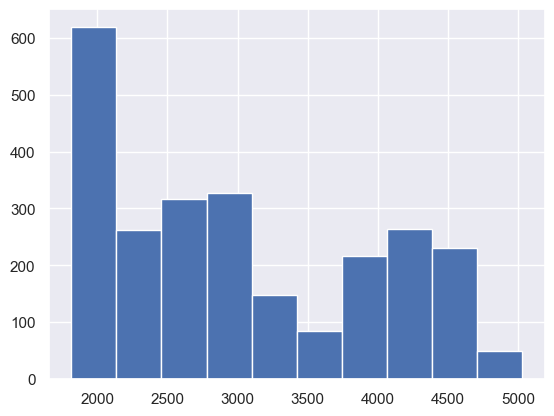

In [7]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [8]:
close_current = df['Close/Last'].iloc[0]
close_current

5021.84

In [9]:
close_mean = df['Close/Last'].mean()
close_mean

3040.92913751988

In [10]:
close_sd = df['Close/Last'].std()
close_sd

913.3016103113936

In [11]:
sigma1 = close_mean + close_sd
sigma1

3954.2307478312737

In [12]:
sigma2 = close_mean + (2 * close_sd)  #bubble (from trend) according to Grantham
sigma2

4867.532358142667

In [13]:
sigma2_5 = close_mean + (2.5 * close_sd)  #super bubble (from trend) according to Grantham
sigma2_5

5324.183163298364

In [14]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 0 to 2531
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2516 non-null   datetime64[ns]
 1   Close/Last  2516 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 59.0 KB


In [15]:
#Date Range
date_start = min(df1['Date']).date()
date_end = max(df1['Date']).date()

Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 2014-02-13 to 2024-02-12')

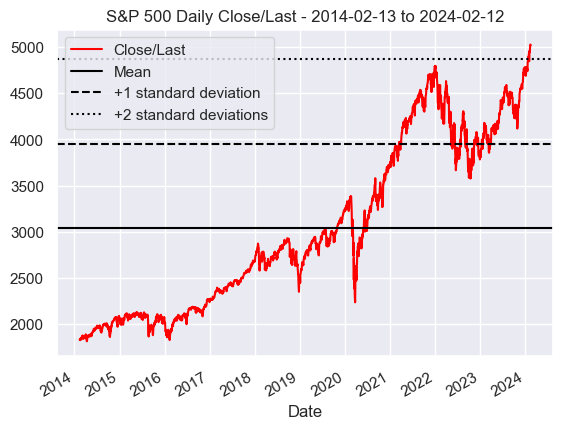

In [16]:
#Daily S&P 500 Close/Last, vs mean and standard deviations

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

df1.plot(x='Date', y='Close/Last', color = c)
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axhline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend()
plt.title(f'S&P 500 Daily Close/Last - {date_start} to {date_end}')

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 2014-02-13 to 2024-02-12')

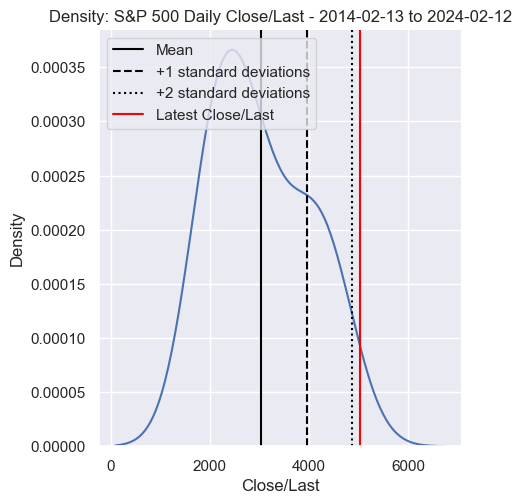

In [17]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html #kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df1['Close/Last'], kind='kde', bw_adjust=3.0) 

plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma1, color='black', linestyle='--', label='+1 standard deviations')
plt.axvline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.axvline(close_current, color=c, label='Latest Close/Last')
plt.legend(loc='upper left')
plt.title(f'Density: S&P 500 Daily Close/Last - {date_start} to {date_end}')

In [18]:
z_score = (close_current - close_mean)/close_sd
z_score

2.168955841219552

In [19]:
# https://realpython.com/linear-regression-in-python/
#Step 4: Get results